# НИРС по ТМО Бибиков Павел ИУ5-62Б

In [82]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score, precision_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

target_col='Genres'

%matplotlib inline 
sns.set(style="ticks")

In [83]:
df = pd.read_csv('googleplaystore.csv')

In [84]:
# Первые 5 строк датасета
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [85]:
# Размер датасета - 10841 строк, 13 колонок
df.shape

(10841, 13)

In [86]:
# Список колонок
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [87]:
# Предположу, что данные версии андроида, обновления и версии нас мало интерисуют, удалим эти столбцы
# удаление столбца
df = df.drop('Android Ver', axis=1)
df = df.drop('Current Ver', axis=1)
df = df.drop('Last Updated', axis=1)

In [88]:
df.columns # Другое дело!

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres'],
      dtype='object')

In [89]:
# Список колонок с типами данных
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
dtype: object

In [90]:
# Как видно, столбец Reviews и прочие имеют тип object, хотя в них числовые значения
# Уберем букву "M", которая обозначает миллион или мегабайт, чтобы остались сухие числа

# удаление строк, содержащих "Varies with device"
df = df[df['Size'] != 'Varies with device']
df = df[df['Price'] != 'Everyone']

# сохранение изменений в исходном файле
#df.to_csv('dataset.csv', index=False)


if df['Size'].dtypes == 'object':
    df['Size'] = df['Size'].str.replace('M', '')
    df['Size'] = df['Size'].str.replace('k', '')
    df['Size'] = df['Size'].str.replace('+', '')
    df['Size'] = df['Size'].str.replace(',', '.')
    df['Size'] = df['Size'].astype(float)

if df['Reviews'].dtypes == 'object':
    df['Reviews'] = df['Reviews'].str.replace('M', '')
    df['Reviews'] = df['Reviews'].astype(int)

if df['Price'].dtypes == 'object':
    df['Price'] = df['Price'].str.replace('$', '')
    df['Price'] = df['Price'].astype(float)
    
if df['Installs'].dtypes == 'object':
    df['Installs'] = df['Installs'].str.replace('M', '')
    df['Installs'] = df['Installs'].str.replace('+', '')
    df['Installs'] = df['Installs'].str.replace(',', '')
    df['Installs'] = df['Installs'].astype(int) # значения в этой колонке слишком большие для float, да и не за чем он тут

if df['Type'].dtypes == 'object':
    df['Type'] = df['Type'].str.replace('Free', 'True') # => True будет значить, что приложение бесплатное 
    df['Type'] = df['Type'].str.replace('Paid', 'False') # => False будет значить, что приложение платное
    df['Type'] = df['Type'].astype(bool)
    

In [91]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int32
Type                 bool
Price             float64
Content Rating     object
Genres             object
dtype: object

In [92]:
df.head(5) # Совсем другое дело! 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,True,0.0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,True,0.0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,True,0.0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,True,0.0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,True,0.0,Everyone,Art & Design;Creativity


In [93]:
# Осталось убрать строки с пустыми значениями и дубликаты
df.isna().sum() 

App                  0
Category             0
Rating            1416
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
dtype: int64

In [94]:
df = df.dropna()
df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
dtype: int64

In [95]:
# 307 дубликатов
df.duplicated().sum()

307

In [96]:
df = df.drop_duplicates()
df.duplicated().sum()
# очистили датасет, теперь он готов для построения графиков

0

In [97]:
# Основные статистические характеристки набора данных
df.describe()

,Rating,Reviews,Size,Installs,Price
count,7422.000000,7.422000e+03,7422.000000,7.422000e+03,7422.000000
mean,4.171315,2.788218e+05,37.574724,7.823331e+06,1.116900
std,0.549803,1.743854e+06,94.975345,4.631033e+07,17.710942
min,1.000000,1.000000e+00,1.000000,1.000000e+00,0.000000
25%,4.000000,9.900000e+01,5.900000,1.000000e+04,0.000000
50%,4.300000,2.066500e+03,16.000000,1.000000e+05,0.000000
75%,4.500000,3.687425e+04,37.000000,1.000000e+06,0.000000
max,5.000000,4.489389e+07,994.000000,1.000000e+09,400.000000


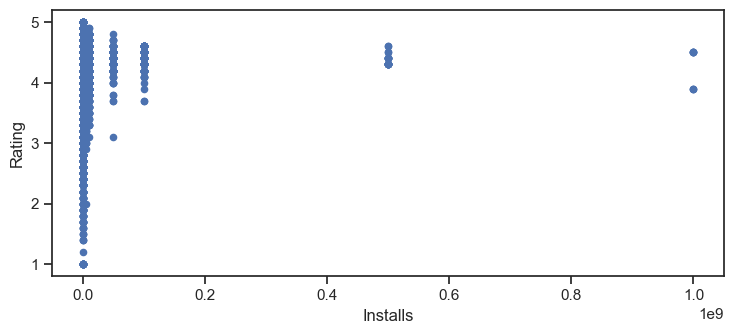

In [98]:
# построение диаграммы рассеяния
df.plot.scatter(x='Installs', y='Rating')

# отображение диаграммы
plt.show()

# По этой диаграмме видно, что плохой рейтинг свойственнен приложениям, которые мало скачивают

<Axes: xlabel='Rating', ylabel='Density'>

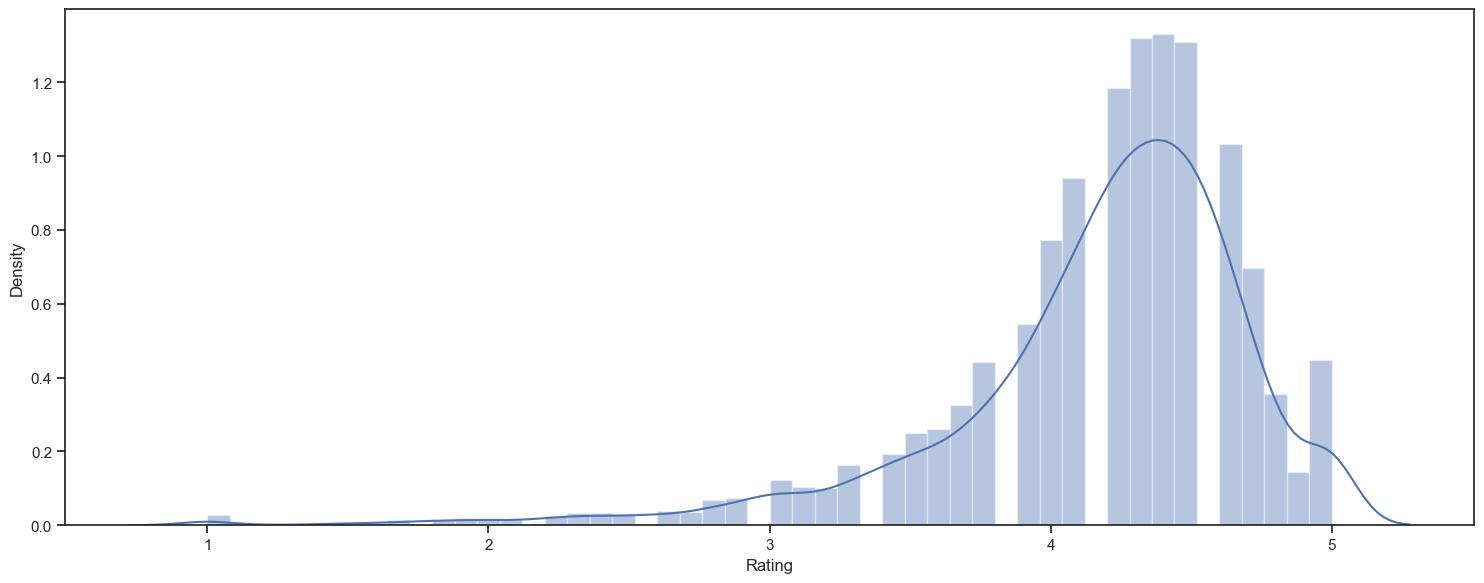

In [99]:
# Гистограмма
# Позволяет оценить плотность вероятности распределения данных.
fig, ax = plt.subplots(figsize=(15,6)) 
sns.distplot(df['Rating'])

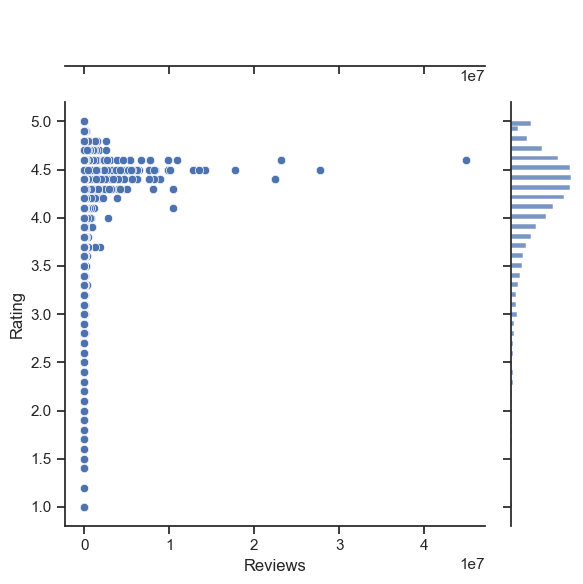

In [100]:
# Jointplot
# Комбинация гистограмм и диаграмм рассеивания. В данном случае это зависимость рейтинга от кол-ва отзывов
sns.jointplot(x='Reviews', y='Rating', data=df)

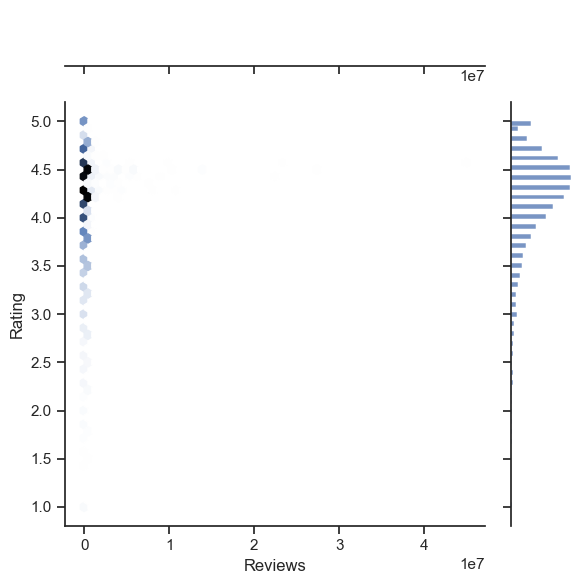

In [101]:
sns.jointplot(x='Reviews', y='Rating', data=df, kind="hex")

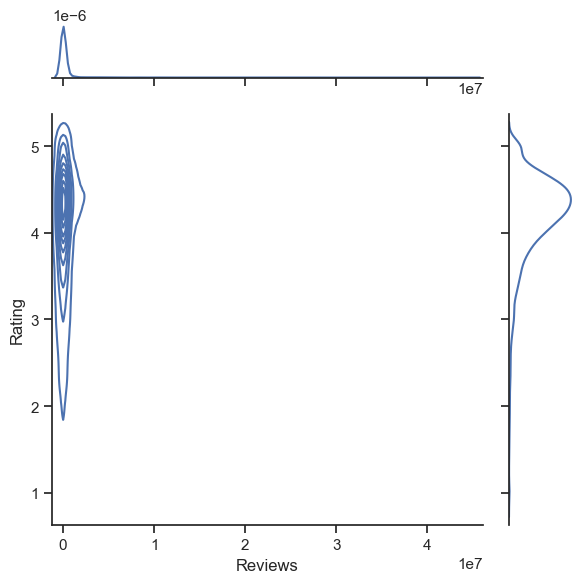

In [102]:
sns.jointplot(x='Reviews', y='Rating', data=df, kind="kde")

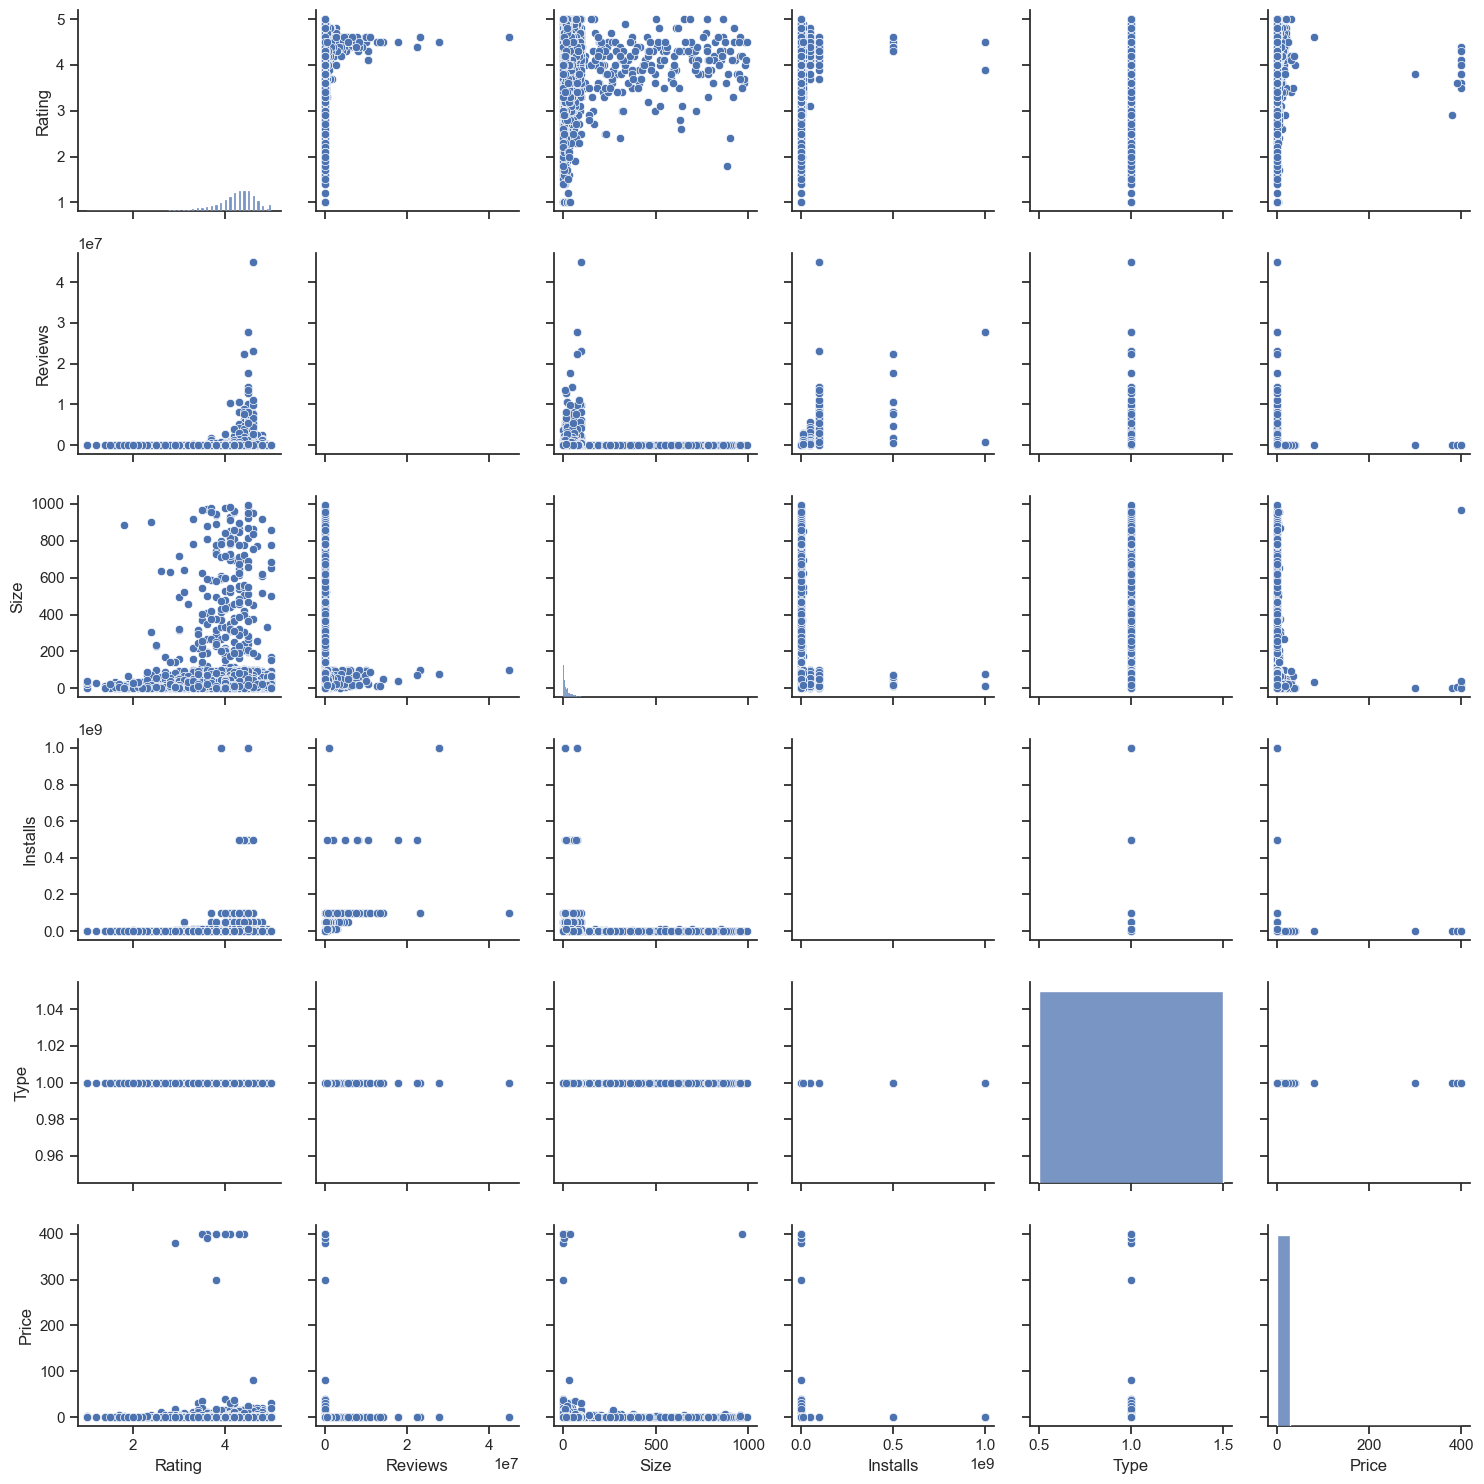

In [103]:
sns.pairplot(df)

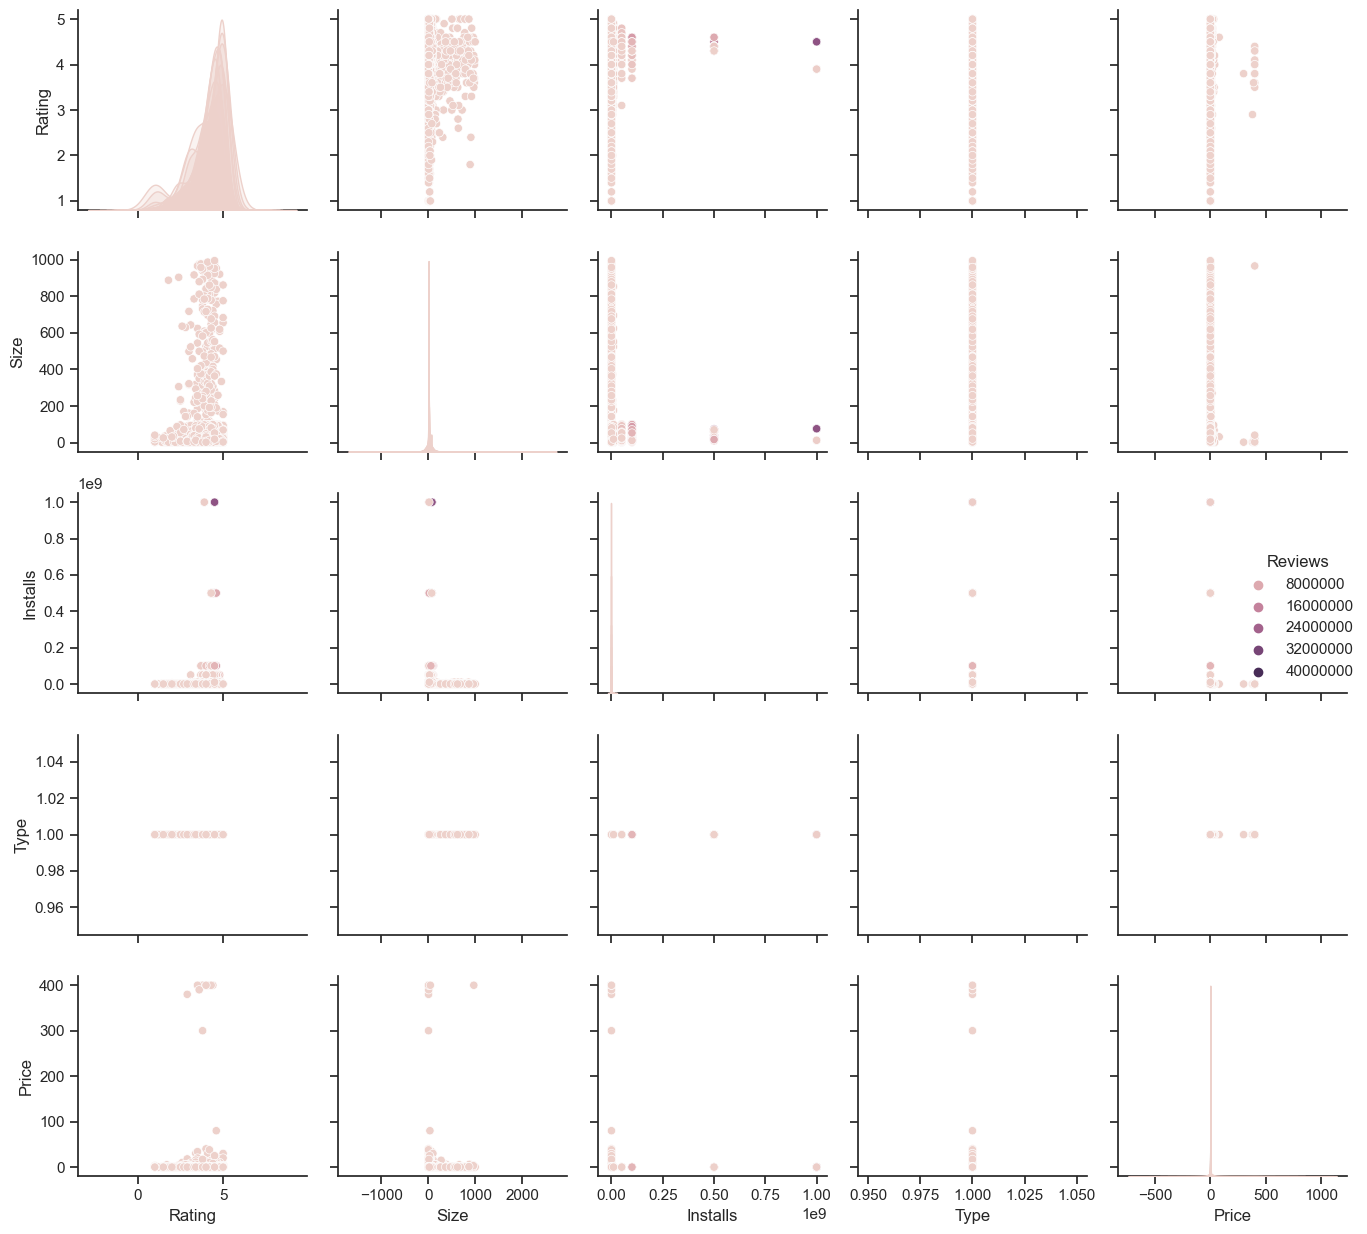

In [104]:
sns.pairplot(df, hue="Reviews")

<Axes: xlabel='Reviews'>

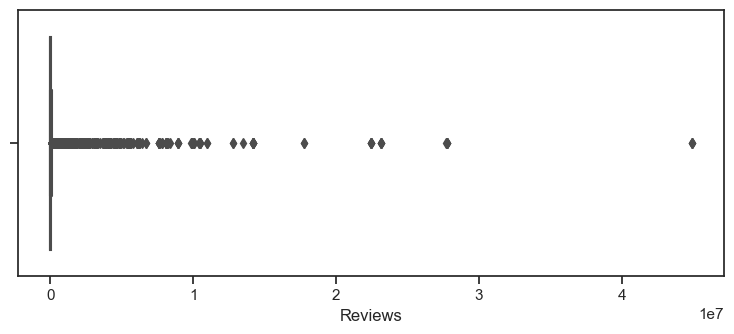

In [105]:
sns.boxplot(x=df['Reviews'])

<Axes: ylabel='Reviews'>

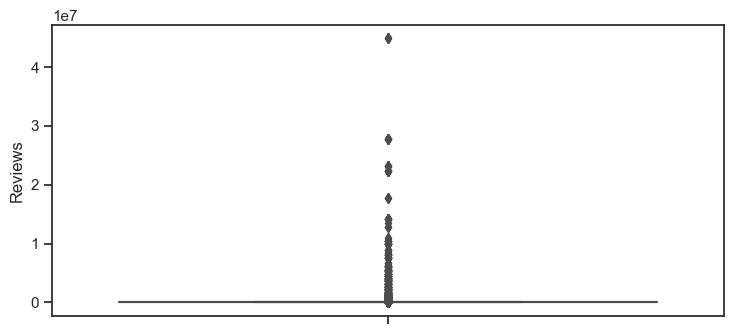

In [106]:
# По вертикали
sns.boxplot(y=df['Reviews'])

<Axes: xlabel='Rating', ylabel='Reviews'>

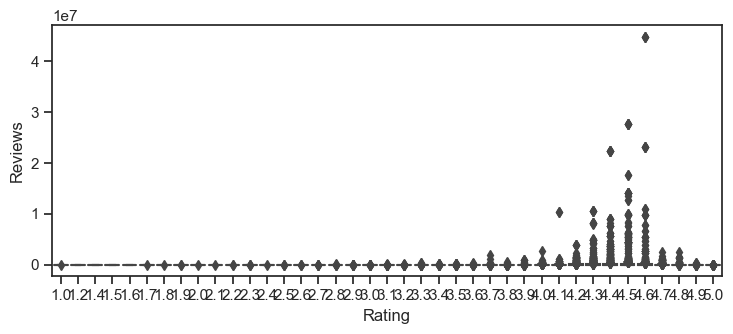

In [107]:
# Распределение параметра Y сгруппированные по Rating.
sns.boxplot(x='Rating', y='Reviews', data=df)

<Axes: xlabel='Reviews'>

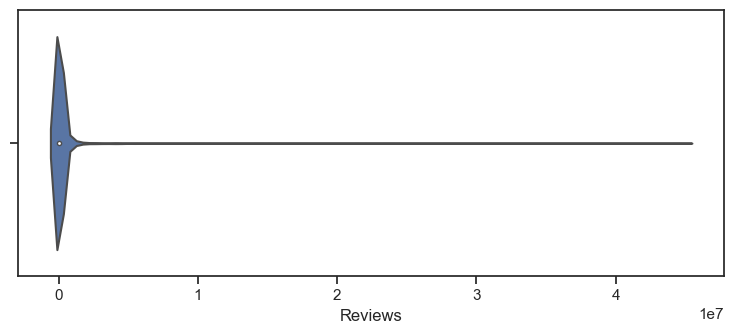

In [108]:
sns.violinplot(x=df['Reviews'])

<Axes: xlabel='Reviews', ylabel='Density'>

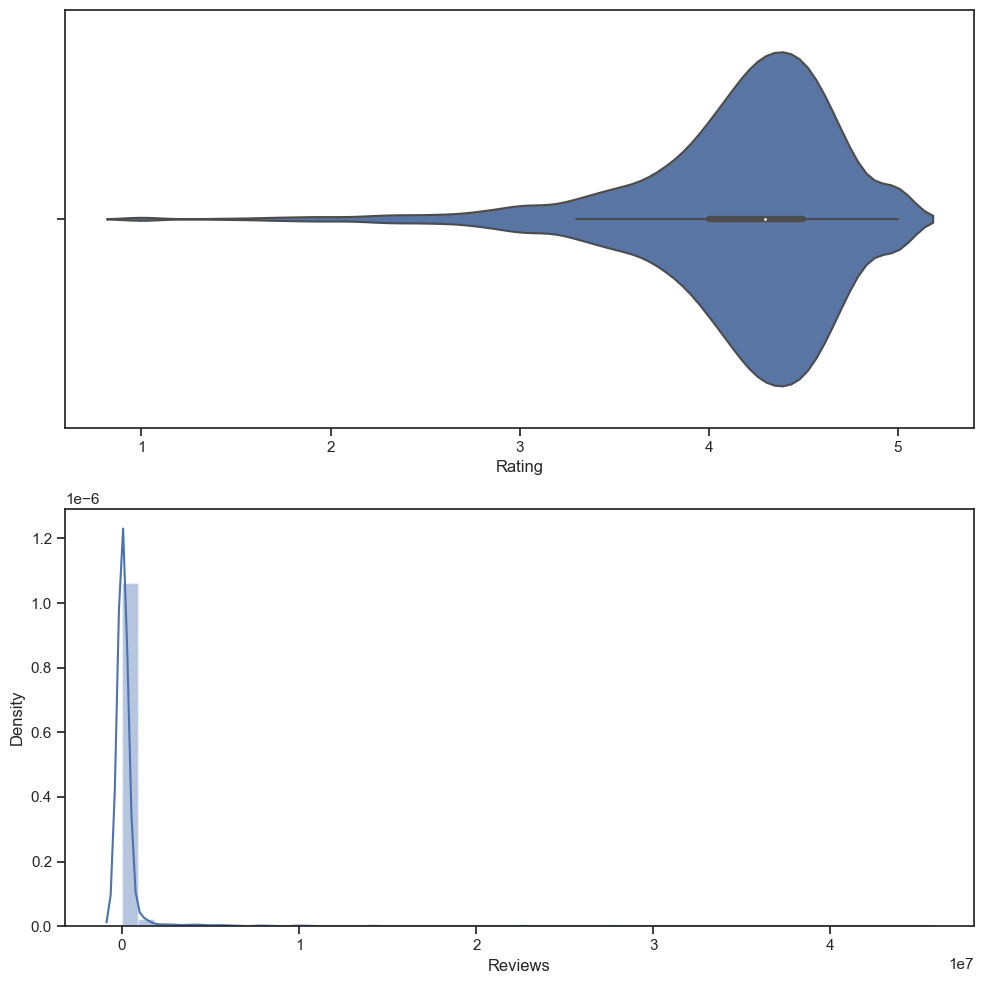

In [109]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
sns.violinplot(ax=ax[0], x=df['Rating'])
sns.distplot(df['Reviews'], ax=ax[1])

<Axes: xlabel='Rating', ylabel='Reviews'>

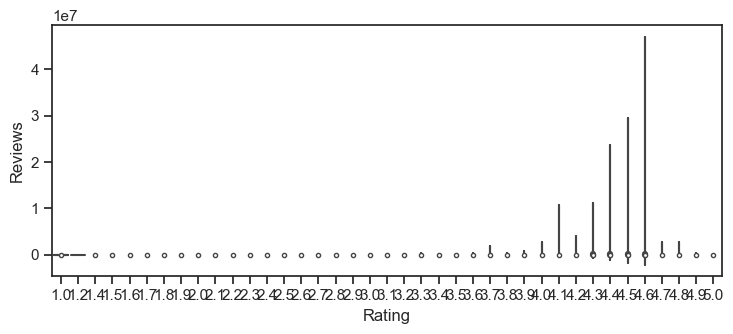

In [110]:
# Распределение параметра Y сгруппированные по Rating.
sns.violinplot(x='Rating', y='Reviews', data=df)

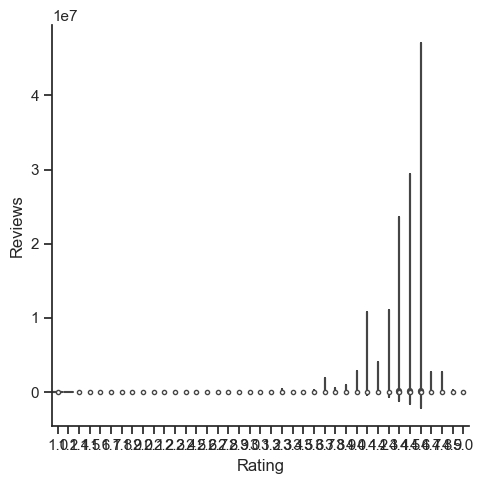

In [111]:
sns.catplot(y='Reviews', x='Rating', data=df, kind="violin", split=True)

In [112]:
df.corr(numeric_only=True)

,Rating,Reviews,Size,Installs,Type,Price
Rating,1.000000,0.080458,-0.019917,0.054362,NaN,-0.021924
Reviews,0.080458,1.000000,0.034872,0.632042,NaN,-0.010012
Size,-0.019917,0.034872,1.000000,0.016490,NaN,0.018735
Installs,0.054362,0.632042,0.016490,1.000000,NaN,-0.010621
Type,NaN,NaN,NaN,NaN,NaN,NaN
Price,-0.021924,-0.010012,0.018735,-0.010621,NaN,1.000000


In [113]:
from scipy import stats
res = stats.spearmanr(df)
res.correlation
res.pvalue

array([[0.00000000e+000, 2.09640413e-001, 4.01232833e-002,
        6.27838637e-053, 8.61763859e-011, 4.49130497e-051,
                    nan, 1.78709725e-001, 1.98540158e-004,
        9.38732076e-002],
       [2.09640413e-001, 0.00000000e+000, 3.95928056e-004,
        3.67127776e-002, 3.45840477e-020, 3.79377753e-003,
                    nan, 6.08261518e-002, 4.20285311e-028,
        0.00000000e+000],
       [4.01232833e-002, 3.95928056e-004, 0.00000000e+000,
        2.75936876e-022, 8.71414480e-002, 2.37793892e-002,
                    nan, 4.99382412e-007, 6.30089802e-001,
        6.24204281e-006],
       [6.27838637e-053, 3.67127776e-002, 2.75936876e-022,
        0.00000000e+000, 1.13040242e-174, 0.00000000e+000,
                    nan, 3.38081694e-048, 1.86907426e-060,
        4.10529347e-001],
       [8.61763859e-011, 3.45840477e-020, 8.71414480e-002,
        1.13040242e-174, 0.00000000e+000, 2.81323623e-148,
                    nan, 9.25643417e-001, 1.04194316e-054,
        4.0

<Axes: >

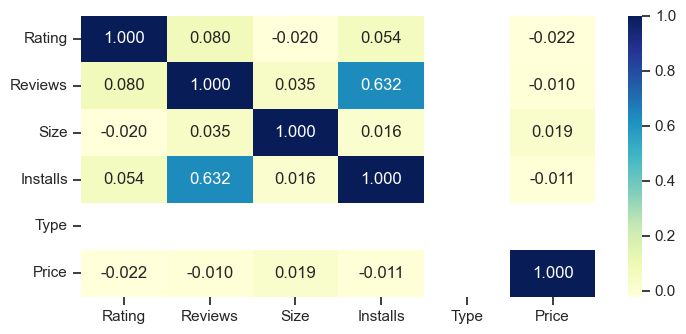

In [114]:
# Метод Пирсона
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.3f', cmap='YlGnBu',)

<Axes: >

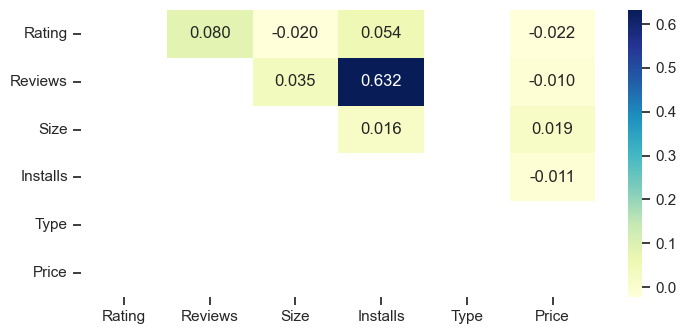

In [115]:
# Треугольный вариант матрицы
mask = np.zeros_like(df.corr(numeric_only=True), dtype=bool)
# чтобы оставить нижнюю часть матрицы
# mask[np.triu_indices_from(mask)] = True
# чтобы оставить верхнюю часть матрицы
mask[np.tril_indices_from(mask)] = True
sns.heatmap(df.corr(numeric_only=True), mask=mask, annot=True, fmt='.3f', cmap='YlGnBu')

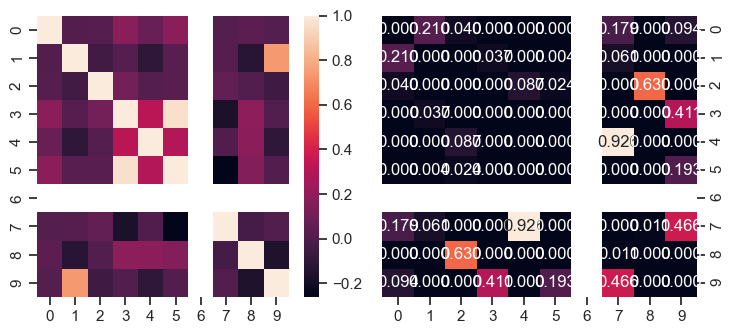

In [116]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.subplots_adjust(wspace=0.01)

sns.heatmap(res.correlation, ax=ax1, )
sns.heatmap(res.pvalue, ax=ax2, cbar=False, annot=True, fmt='.3f')
ax2.yaxis.tick_right()

fig.subplots_adjust(wspace=0.1)
plt.show()

## Подготовка обучающей и тестовой выборки, кросс-валидация и подбор гиперпараметров на примере метода ближайших соседей

In [117]:
# Напомним себе содержание датасета
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,True,0.0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,True,0.0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,True,0.0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,True,0.0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,True,0.0,Everyone,Art & Design;Creativity


Для целей обучения и удобства визуализации я в начале возьму в качестве известных признаков BMI & BP. Результирующим параметром у нас является параметр Y

In [118]:
#  выбираем только три столбца из df и создаем новый DataFrame data_for_lab, содержащий только эти три столбца
data_for_lab = df[['Installs', 'Rating', 'Reviews']]

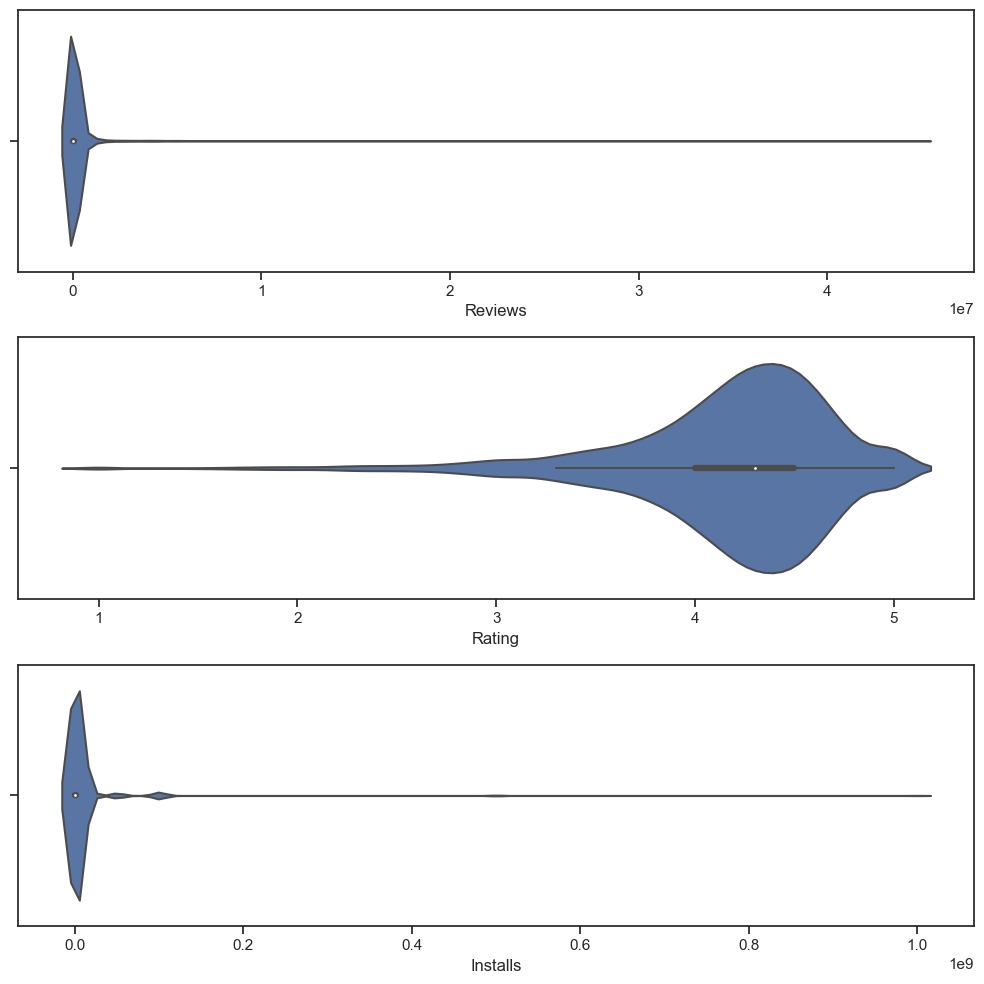

In [119]:
# создаем фигуру с тремя графиками, каждый график представляет одну из трех переменных. Функция subplots() создает три графика, 
# которые располагаются в одном столбце (3, 1), и каждый график имеет размер 10 на 10.
fig, ax = plt.subplots(3, 1, figsize=(10,10))
# создаем график скрипки для первой переменной (Installs). Аргумент ax указывает, в каком графике отображать этот график скрипки. Аргумент x указывает, какую переменную использовать для оси x.
# Аналогично, создаем график скрипки для второй переменной (Rating), а следующая строка кода создает график скрипки для третьей переменной (Reviews).
sns.violinplot(ax=ax[0], x=data_for_lab['Reviews'])
sns.violinplot(ax=ax[1], x=data_for_lab['Rating'])
sns.violinplot(ax=ax[2], x=data_for_lab['Installs'])
plt.show()

Можем заметить что признаки отличаются друг от друга по масштабу, поэтому необходимо привести их к единому методом стандартизации, так как это оптимальный способ масштабирования для нашего метода. 

<Axes: xlabel='Reviews', ylabel='Rating'>

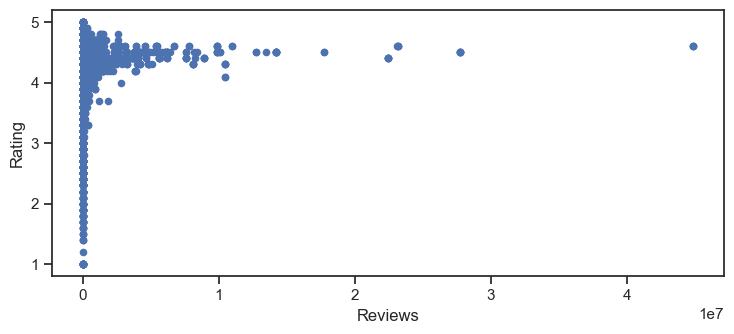

In [120]:
#Стандартизация с помощью класса StandartScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data_for_lab.drop('Installs', axis=1))
scaled_data = pd.DataFrame(scaled, columns = data_for_lab.drop('Installs', axis=1).columns)
data_for_lab.plot.scatter(x="Reviews", y="Rating")

<Axes: xlabel='Reviews', ylabel='Rating'>

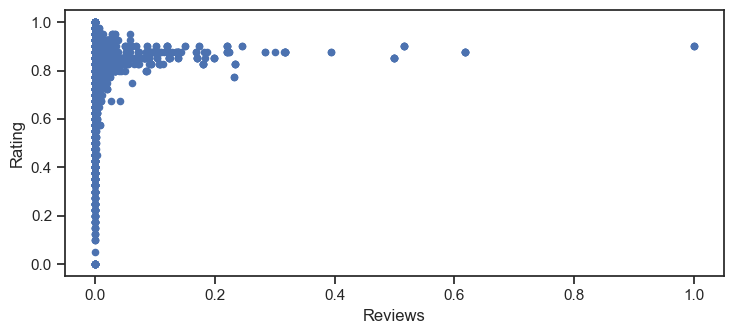

In [121]:
# строим scatter plot (диаграмму рассеяния) с помощью метода `plot.scatter()
scaled_data.plot.scatter(x="Reviews", y="Rating")

## 2. Разделение выборки на тестовую и обучающую.

Выполним разбиение с поомщью функции sklearn.model_selection.train_test_split, объем тестовой выборки зададим равным 0.3 от общего объема.

In [122]:
x = scaled_data
y = data_for_lab['Installs']

# test_size = 0.3 указывает, что 30% данных будут использоваться для тестирования модели, а 70% - для ее обучения.
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x, y, test_size = 0.3)

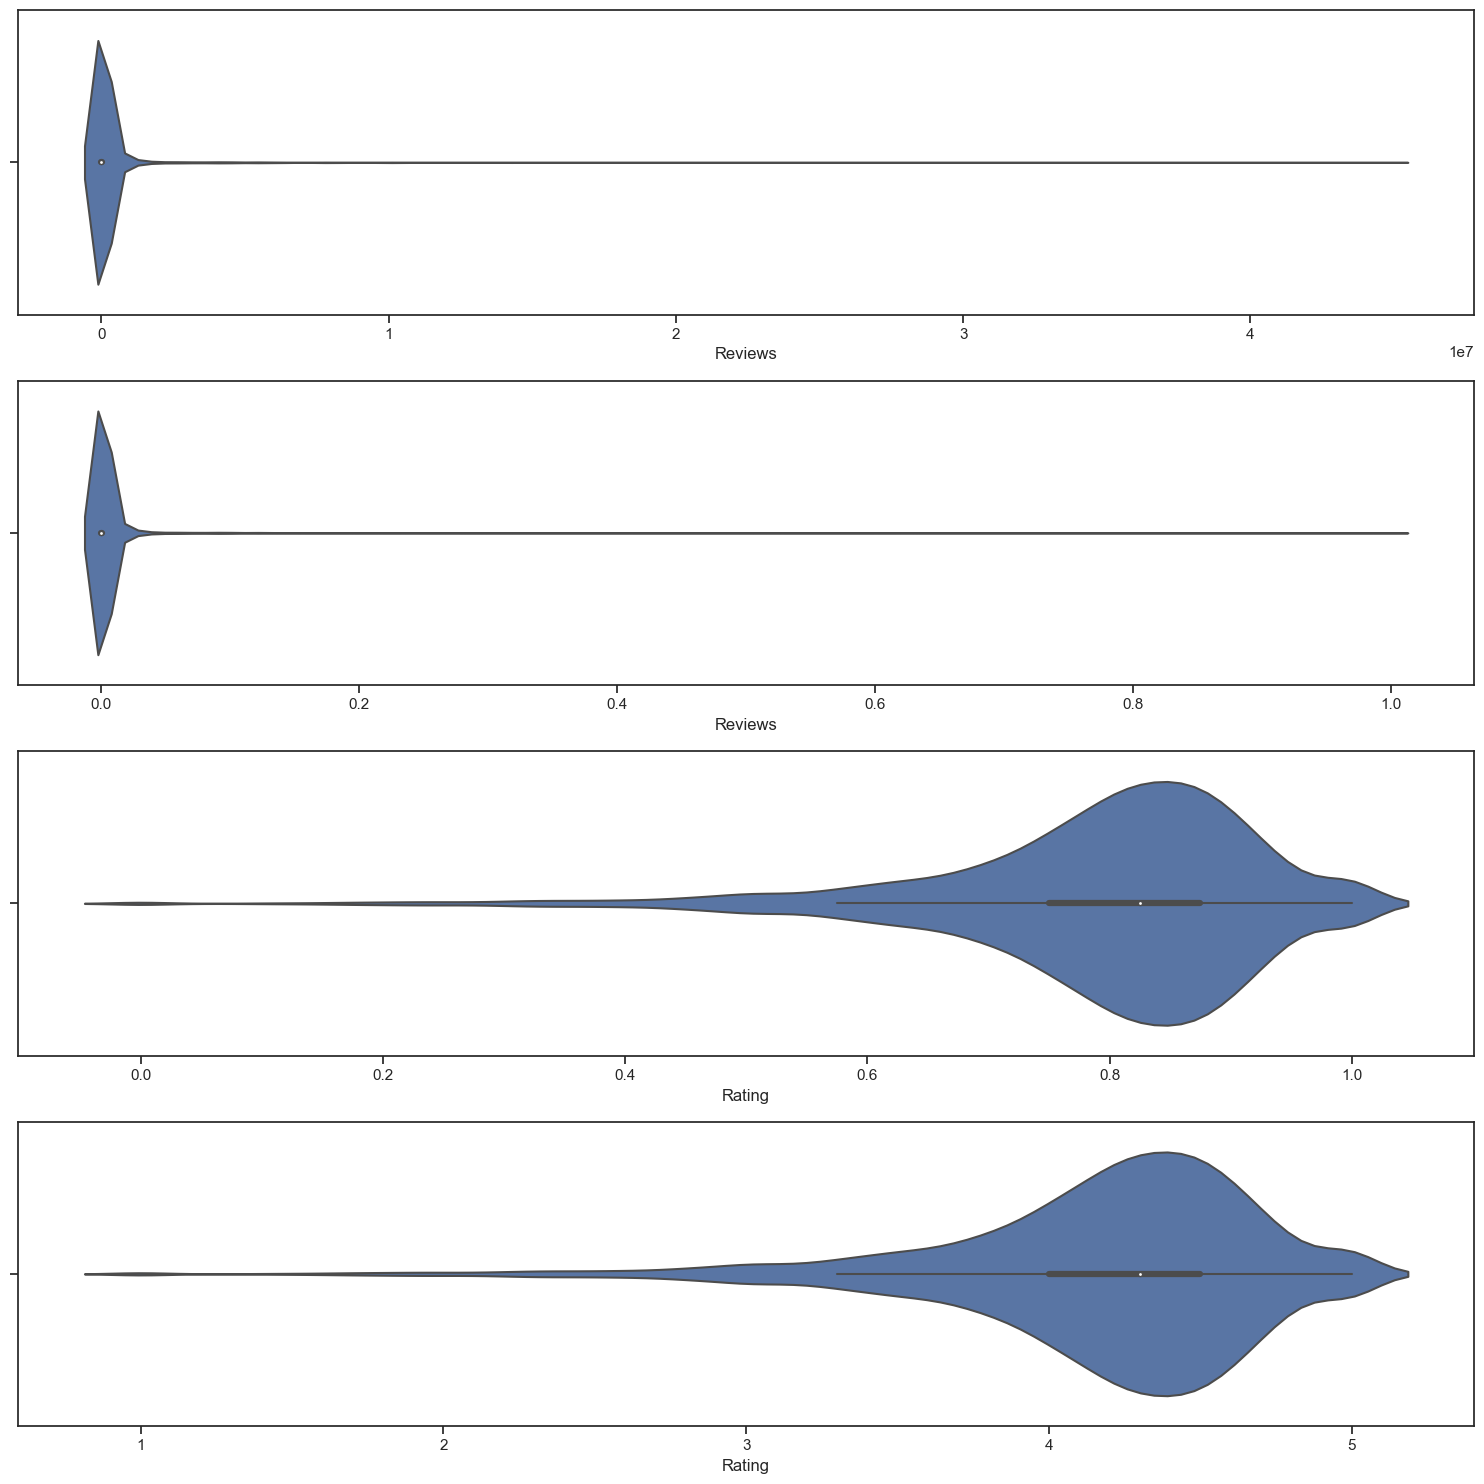

In [123]:
fig, ax = plt.subplots(4, 1, figsize=(15, 15))
sns.violinplot(ax=ax[0], x=data_for_lab['Reviews'])
sns.violinplot(ax=ax[1], x=scaled_data['Reviews'])
sns.violinplot(ax=ax[2], x=scaled_data['Rating'])
sns.violinplot(ax=ax[3], x=data_for_lab['Rating'])

plt.show()

## Обучение

In [124]:
# создадим объект KNeighborsRegressor из библиотеки sklearn с параметром n_neighbors = 100, 
# который определяет количество ближайших соседей, используемых для прогнозирования значения целевой переменной
KNeighborsRegressorObj = KNeighborsRegressor(n_neighbors=100) 
# Затем метод fit() применяется к обучающим данным
KNeighborsRegressorObj.fit(x_training_data, y_training_data)
# После обучения модели метод predict() используется для прогнозирования значений целевой переменной на тестовых данных x_test_data. 
# Результаты прогнозирования сохраняются в переменной y_predictions.
y_predictions = KNeighborsRegressorObj.predict(x_test_data)

In [125]:
# Используем несколько функций из библиотеки sklearn.metrics для оценки качества прогнозов модели.
# Функция r2_score() используется для вычисления коэффициента детерминации (R-квадрат), который измеряет, насколько хорошо модель соответствует данным.
# Функция mean_absolute_error() используется для вычисления средней абсолютной ошибки (MAE), которая измеряет среднее абсолютное отклонение прогнозов модели от фактических значений
# Функция mean_squared_error() используется для вычисления среднеквадратичной ошибки (MSE), которая измеряет среднее квадратичное отклонение прогнозов модели от фактических значений.

print(
r2_score(y_test_data, y_predictions, multioutput='raw_values'),
mean_absolute_error(y_test_data, y_predictions, multioutput='raw_values'),
mean_squared_error(y_test_data, y_predictions, multioutput='raw_values'))

[0.3991952] [4220002.95533902] [1.02908877e+15]


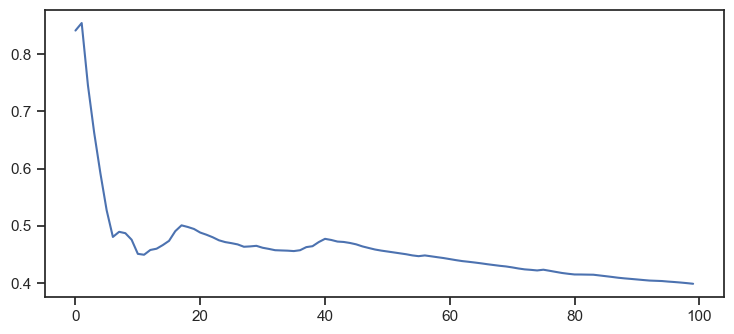

In [126]:
# Построим график зависимости коэффициента детерминации от количества ближайших соседей
error_rates = []
for i in np.arange(1, 101):
    new_model = KNeighborsRegressor(n_neighbors = i)
    new_model.fit(x_training_data, y_training_data)
    new_predictions = new_model.predict(x_test_data)
    error_rates.append(r2_score(y_test_data, new_predictions))
plt.plot(error_rates)

# На оси x отображается количество ближайших соседей, а на оси y - значения коэффициента детерминации. 
# График позволяет определить оптимальное количество соседей для данной модели.

## Линейные модели, SVM и деревья решений

In [127]:
# Посмотрим на типы полей
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int32
Type                 bool
Price             float64
Content Rating     object
Genres             object
dtype: object

Категориальные признаки

In [128]:
for col in df.columns:
    column_type = df[col].dtype
    if column_type == 'object':
        print(col)

App
Category
Content Rating
Genres


Кодируем признаки

In [129]:
# Названия приложений в будут мешаться
df = df.drop('App', axis=1)

In [130]:
le1 = LabelEncoder()
df['Category'] = le1.fit_transform(df['Category']);

le2 = LabelEncoder()
df['Content Rating'] = le2.fit_transform(df['Content Rating']);

le3 = LabelEncoder()
df['Genres'] = le3.fit_transform(df['Genres']);

In [131]:
for col in df.columns:
    column_type = df[col].dtype
    if column_type == 'object':
        print(col)

## Разделение выборки на обучающую и тестовую

In [132]:
# Разделяем данные на две переменные: признаки (X) и целевую переменную (Y)
X = df.drop(target_col, axis=1)
Y = df[target_col]

In [133]:
X

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
0,0,4.1,159,19.0,10000,True,0.0,1
1,0,3.9,967,14.0,500000,True,0.0,1
2,0,4.7,87510,8.7,5000000,True,0.0,1
3,0,4.5,215644,25.0,50000000,True,0.0,4
4,0,4.3,967,2.8,100000,True,0.0,1
...,...,...,...,...,...,...,...,...
10833,3,4.8,44,619.0,1000,True,0.0,1
10834,11,4.0,7,2.6,500,True,0.0,1
10836,11,4.5,38,53.0,5000,True,0.0,1
10837,11,5.0,4,3.6,100,True,0.0,1


In [134]:
Y

0         9
1        11
2         9
3         9
4        10
         ..
10833    18
10834    36
10836    36
10837    36
10840    64
Name: Genres, Length: 7422, dtype: int32

In [135]:
pd.DataFrame(X, columns=X.columns).describe()

,Category,Rating,Reviews,Size,Installs,Price,Content Rating
count,7422.000000,7422.000000,7.422000e+03,7422.000000,7.422000e+03,7422.000000,7422.000000
mean,16.582458,4.171315,2.788218e+05,37.574724,7.823331e+06,1.116900,1.466316
std,8.139044,0.549803,1.743854e+06,94.975345,4.631033e+07,17.710942,1.006587
min,0.000000,1.000000,1.000000e+00,1.000000,1.000000e+00,0.000000,0.000000
25%,11.000000,4.000000,9.900000e+01,5.900000,1.000000e+04,0.000000,1.000000
50%,14.000000,4.300000,2.066500e+03,16.000000,1.000000e+05,0.000000,1.000000
75%,24.000000,4.500000,3.687425e+04,37.000000,1.000000e+06,0.000000,1.000000
max,32.000000,5.000000,4.489389e+07,994.000000,1.000000e+09,400.000000,5.000000


Разделим выборку на обучающую и тестовую:

In [136]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=1)
print('{}, {}'.format(X_train.shape, X_test.shape))
print('{}, {}'.format(Y_train.shape, Y_test.shape))

(5566, 8), (1856, 8)
(5566,), (1856,)


## Обучение моделей

### Линейная модель

In [137]:
# SGDClassifier - это классификатор, основанный на стохастическом градиентном спуске (Stochastic Gradient Descent). 
# max_iter=10000 - это параметр, который указывает максимальное количество итераций для обучения модели.

SGD = SGDClassifier(max_iter=10000)
SGD.fit(X_train, Y_train)

# модель SGD  обучена на обучающих данных и может быть использована для предсказания целевой переменной для новых данных.

SGDClassifier(max_iter=10000)

In [138]:
# вычисляем F1-оценку для предсказаний модели на тестовых данных
f1_score(Y_test, SGD.predict(X_test), average='micro')
# вычисляем оценку точности для предсказаний модели на тестовых данных
precision_score(Y_test, SGD.predict(X_test), average='micro')

0.005387931034482759

### SVM

In [139]:
SVC = SVC(kernel='rbf')
SVC.fit(X_train, Y_train)

SVC()

In [140]:
f1_score(Y_test, SVC.predict(X_test), average='micro')
precision_score(Y_test, SVC.predict(X_test), average='micro')

0.09482758620689655

### Дерево решений

In [141]:
DT = DecisionTreeClassifier(random_state=1)
DT.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=1)

In [142]:
f1_score(Y_test, DT.predict(X_test), average='micro')
precision_score(Y_test, DT.predict(X_test), average='micro')

0.7435344827586207

Можно сделать вывод, что дерево решений дает лучший результат

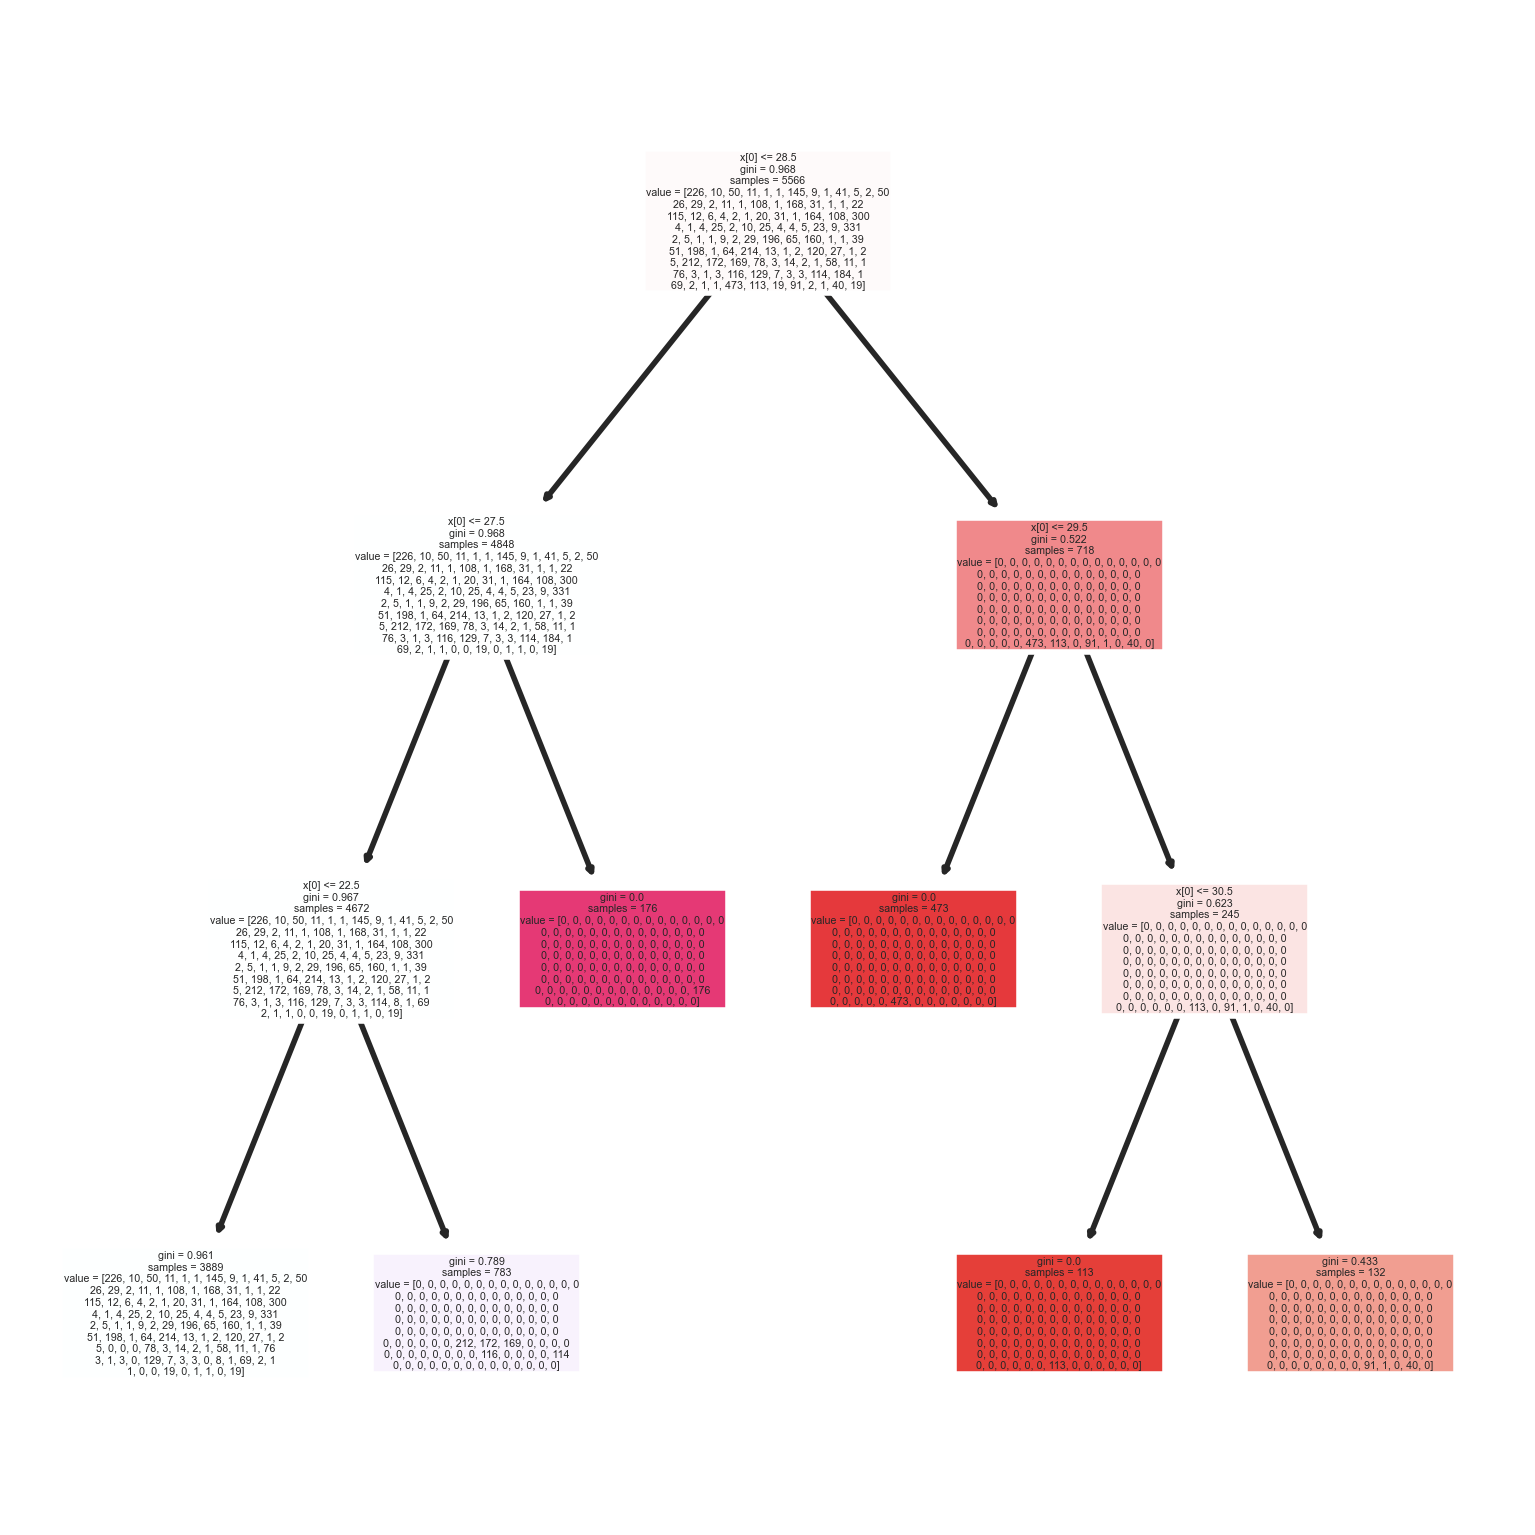

In [143]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=400)
clf = DecisionTreeClassifier(max_depth = 3, 
                             random_state = 0)
clf.fit(X_train, Y_train)
tree.plot_tree(clf, filled = True);

## Ансамбли моделей машинного обучения
Модель многослойного персептрона. По желанию, вместо библиотеки scikit-learn возможно использование библиотек TensorFlow, PyTorch или других аналогичных библиотек.
Модель МГУА с использованием библиотеки - https://github.com/kvoyager/GmdhPy (или аналогичных библиотек). Найдите такие параметры запуска модели, при которых она будет по крайней мере не хуже, чем одна из предыдущих ансамблевых моделей.
Оцените качество моделей с помощью одной из подходящих для задачи метрик. Сравните качество полученных моделей.

In [144]:
# скроем предупреждения о возможных ошибках для лучшей читаемости
import warnings
warnings.filterwarnings('ignore')

In [145]:
df

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,0,4.1,159,19.0,10000,True,0.0,1,9
1,0,3.9,967,14.0,500000,True,0.0,1,11
2,0,4.7,87510,8.7,5000000,True,0.0,1,9
3,0,4.5,215644,25.0,50000000,True,0.0,4,9
4,0,4.3,967,2.8,100000,True,0.0,1,10
...,...,...,...,...,...,...,...,...,...
10833,3,4.8,44,619.0,1000,True,0.0,1,18
10834,11,4.0,7,2.6,500,True,0.0,1,36
10836,11,4.5,38,53.0,5000,True,0.0,1,36
10837,11,5.0,4,3.6,100,True,0.0,1,36


In [146]:
for col in df.columns:
    column_type = df[col].dtype
    if column_type == 'object':
        print(col)

все признаки уже закодированны

## Разделение выборки на обучающую и тестовую

In [147]:
from sklearn.model_selection import train_test_split

df_x = df.loc[:, df.columns != 'Reviews']
df_y = df['Reviews']

train_x, test_x, train_y, test_y = train_test_split(df_x, df_y, test_size=0.3, random_state=1)

In [148]:
train_x.shape   

(5195, 8)

In [149]:
test_x.shape

(2227, 8)

In [153]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error, r2_score

def test_model(model):
    print('mean_absolute_error: {}'.format(round(mean_absolute_error(test_y, model.predict(test_x)), 2)))
    print('median_absolute_error: {}'.format(round(median_absolute_error(test_y, model.predict(test_x)), 2)))
    print('r2_score: {}'.format(round(r2_score(test_y, model.predict(test_x)), 2)))

## Обучение моделей

### Случайный лес

In [154]:
from sklearn.ensemble import RandomForestRegressor

ran_80 = RandomForestRegressor(n_estimators=80)
ran_80.fit(train_x, train_y)

RandomForestRegressor(n_estimators=80)

In [155]:
test_model(ran_80)

mean_absolute_error: 100712.6
median_absolute_error: 1177.35
r2_score: 0.77


In [156]:
param_range = np.arange(50, 170, 10)
tuned_parameters = [{'n_estimators': param_range}]
tuned_parameters

[{'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160])}]

In [157]:
from sklearn.model_selection import ShuffleSplit

gs = GridSearchCV(RandomForestRegressor(), tuned_parameters,
                  cv=ShuffleSplit(n_splits=10), scoring="r2",
                  return_train_score=True, n_jobs=-1)
gs.fit(df_x, df_y)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=None, test_size=None, train_size=None),
             estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid=[{'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160])}],
             return_train_score=True, scoring='r2')

In [158]:
reg = gs.best_estimator_

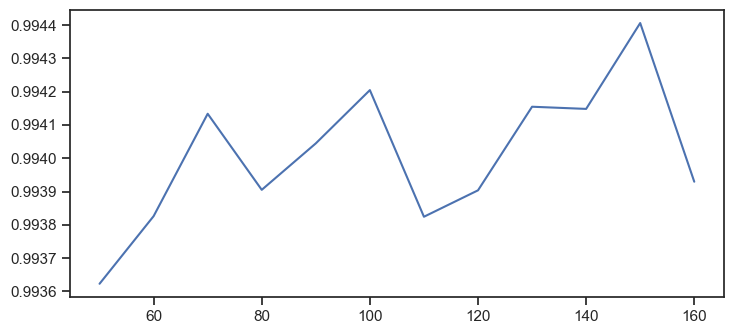

In [159]:
import matplotlib.pyplot as plt

plt.plot(param_range, gs.cv_results_["mean_train_score"]);

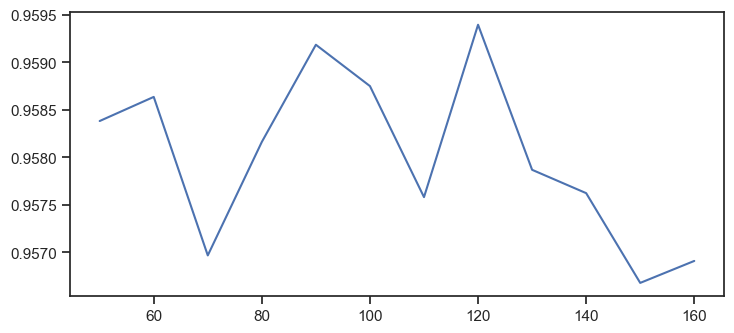

In [160]:
plt.plot(param_range, gs.cv_results_["mean_test_score"]);

In [161]:
reg.fit(train_x, train_y)
test_model(reg)

mean_absolute_error: 96949.52
median_absolute_error: 1173.77
r2_score: 0.8


### Градиентный бустинг

In [162]:
from sklearn.ensemble import GradientBoostingRegressor

gr_80 = GradientBoostingRegressor(n_estimators=80)
gr_80.fit(train_x, train_y)

GradientBoostingRegressor(n_estimators=80)

In [163]:
test_model(gr_80)

mean_absolute_error: 143935.18
median_absolute_error: 13921.55
r2_score: 0.76


In [164]:
gs = GridSearchCV(GradientBoostingRegressor(), tuned_parameters,
                  cv=ShuffleSplit(n_splits=10), scoring="r2",
                  return_train_score=True, n_jobs=-1)
gs.fit(df_x, df_y)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=None, test_size=None, train_size=None),
             estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid=[{'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160])}],
             return_train_score=True, scoring='r2')

In [165]:
reg = gs.best_estimator_

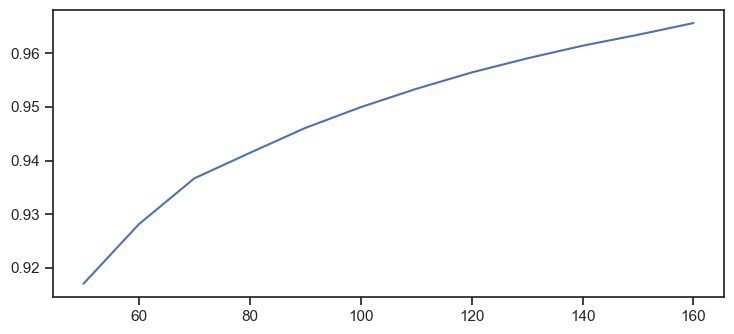

In [166]:
plt.plot(param_range, gs.cv_results_["mean_train_score"]);

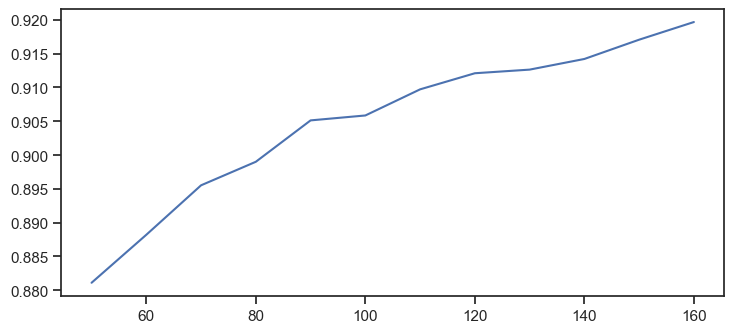

In [167]:
plt.plot(param_range, gs.cv_results_["mean_test_score"]);

In [168]:
reg.fit(train_x, train_y)
test_model(reg)

mean_absolute_error: 136832.66
median_absolute_error: 11823.8
r2_score: 0.81
